# Lesson20_Assignment
(nahiyanhkhan@gmail.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
stock_data = pd.read_csv(r"Stock_Market_Data.csv")
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [3]:
stock_data.dtypes

Date       object
Name       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [4]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], dayfirst=True)
stock_data.dtypes

Date      datetime64[ns]
Name              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [5]:
len(stock_data)

49158

# Part 1: Data Cleaning and Exploration:

<h3>1) Calculate basic summary statistics for each column (mean, median, standard deviation, etc.).<h3>

In [6]:
index_values = ['Open', 'High', 'Low', 'Close', 'Volume']

mean_values, median_values, mode_values = [], [], []
std_dev, min_values, max_values = [], [], []
p25_values, p50_values, p75_values = [], [], []

for col in stock_data.columns[2:]:
    mean_values.append(round(stock_data[col].mean(), 2))
    median_values.append(round(stock_data[col].median(), 2))
    mode_values.append(stock_data[col].mode()[0])
    std_dev.append(round(stock_data[col].std(), 2))
    min_values.append(round(stock_data[col].min(), 2))
    max_values.append(round(stock_data[col].max(), 2))
    p25_values.append(round(stock_data[col].quantile(0.25), 2))
    p50_values.append(round(stock_data[col].quantile(0.50), 2))
    p75_values.append(round(stock_data[col].quantile(0.75), 2))


df = pd.DataFrame({'Mean': mean_values, 'Median': median_values, 'Mode': mode_values,
                   'Standard Deviation': std_dev, 'Minimum': min_values, 'Maximum': max_values,
                   '25 Percentile': p25_values, '50 Percentile': p50_values, '75 Percentile': p75_values
                  },
                  index=index_values)
df.transpose()

,Open,High,Low,Close,Volume
Mean,157.87,159.59,155.91,157.35,561999.93
Median,40.30,41.00,39.53,40.10,182416.00
Mode,7.50,7.60,7.50,7.50,1.00
Standard Deviation,520.19,523.35,517.14,519.71,1276908.70
Minimum,3.90,3.90,3.00,3.80,1.00
Maximum,6000.00,6050.00,5975.00,6000.50,65931798.00
25 Percentile,19.00,19.30,18.70,19.00,51094.75
50 Percentile,40.30,41.00,39.53,40.10,182416.00
75 Percentile,89.40,90.50,87.70,88.70,540139.75


<h3>2) Explore the distribution of the 'Close' prices over time.<h3>

In [7]:
unique_comp = stock_data['Name'].unique().tolist()
companies = random.sample(unique_comp, 6)
companies

['SUMITPOWER', 'BSRMSTEEL', 'NFML', 'DGIC', 'SHEPHERD', 'MONNOAGML']

In [8]:
font = {'fontsize':15}

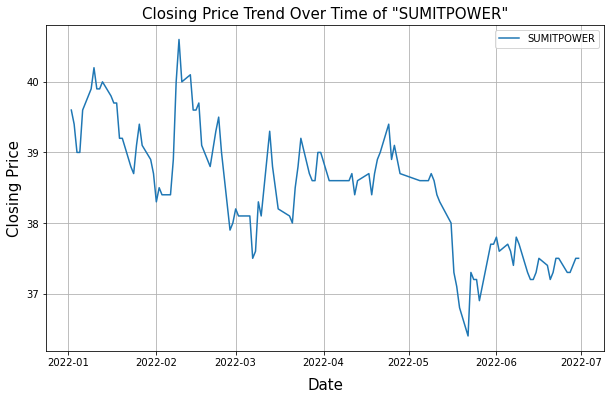

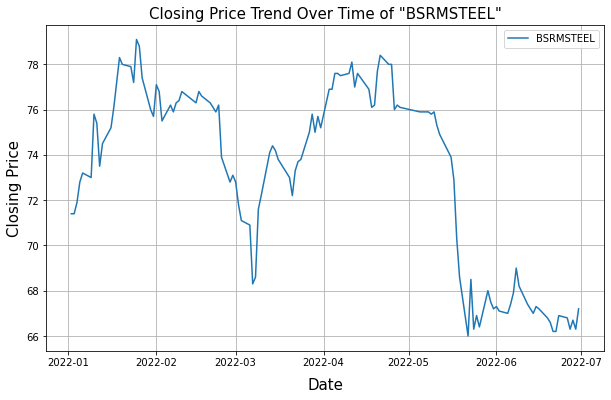

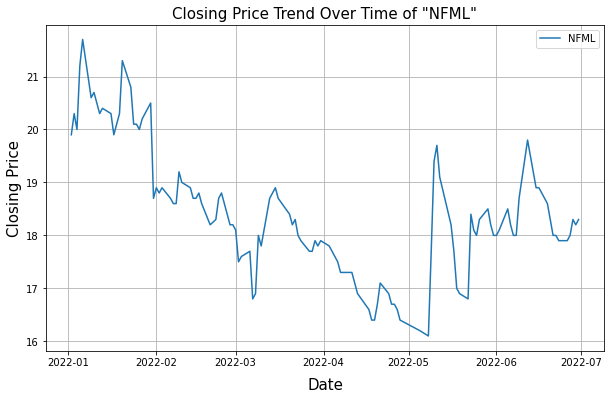

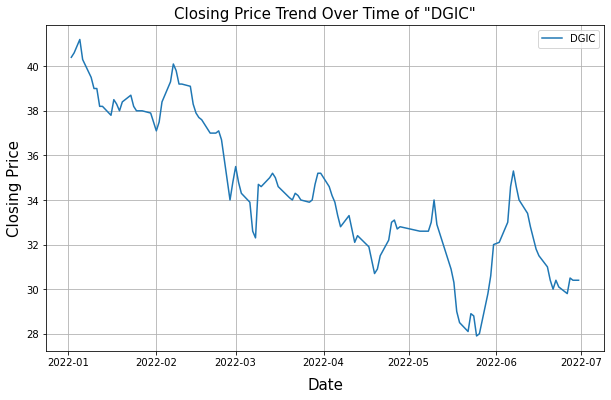

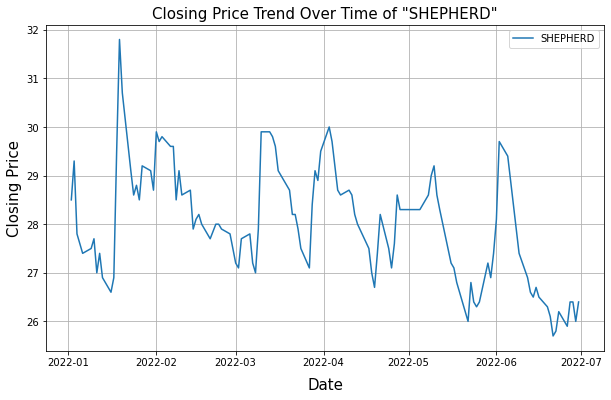

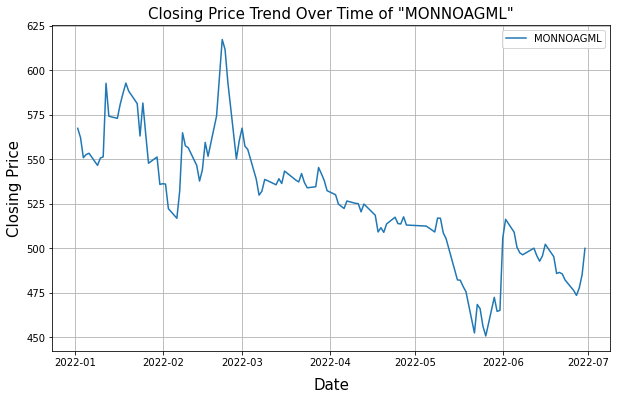

In [9]:
for comp in companies:
    plt.figure(figsize=(10, 6))
    
    comp_data = stock_data[stock_data['Name']==comp]
    plt.plot(comp_data['Date'], comp_data['Close'], label=comp)

    plt.xlabel('Date', labelpad=10, fontdict=font)
    plt.ylabel('Closing Price', fontdict=font)
    plt.title(f'Closing Price Trend Over Time of "{comp}"', fontdict=font)
    plt.legend()
    plt.grid()

    plt.show()

<h3>3) Identify and analyze any outliers (if any) in the dataset.<h3>

In [10]:
print(sum(stock_data['Date'].isna()))
print(sum(stock_data['Name'].isna()))
print(sum(stock_data['Open'].isna()))
print(sum(stock_data['High'].isna()))
print(sum(stock_data['Low'].isna()))
print(sum(stock_data['Close'].isna()))
print(sum(stock_data['Volume'].isna()))

0
0
0
0
0
0
0


> *As all the values are **0**, that means there is no **'NaN'** value available in the dataset.*

In [11]:
from scipy.stats import zscore

> *For **'Open'** column* 👇

In [12]:
outliers_df = pd.DataFrame()

threshold = 3

for company in unique_comp:
    company_data = stock_data.loc[stock_data['Name'] == company, ['Date', 'Name', 'Open']]
    
    company_data['Open_ZScore'] = zscore(company_data['Open'])
    
    outliers = company_data[abs(company_data['Open_ZScore']) > threshold]
    
    outliers_df = pd.concat([outliers_df, outliers])

outliers_df

,Date,Name,Open,Open_ZScore
33052,2022-05-31,02.Cement,65.13,-3.902236
8914,2022-02-24,03.Ceramics_Sector,83.45,3.229446
33084,2022-05-25,04.Engineering,117.52,-3.510968
16650,2022-03-23,06.Food_&_Allied,177.99,-6.540767
9024,2022-02-17,09.IT_Sector,39.95,-3.354184
...,...,...,...,...
48608,2022-06-30,TOSRIFA,26.10,3.776367
39941,2022-05-08,UNIQUEHRL,75.90,3.178680
32902,2022-04-28,WALTONHIL,1199.00,3.135050
8836,2022-01-30,ZAHINTEX,6.90,-3.156598


> *For **'High'** column* 👇

In [13]:
outliers_df = pd.DataFrame()

threshold = 3

for company in unique_comp:
    company_data = stock_data.loc[stock_data['Name'] == company, ['Date', 'Name', 'High']]
    
    company_data['High_ZScore'] = zscore(company_data['High'])
    
    outliers = company_data[abs(company_data['High_ZScore']) > threshold]
    
    outliers_df = pd.concat([outliers_df, outliers])

outliers_df

,Date,Name,High,High_ZScore
33052,2022-05-31,02.Cement,65.23,-3.947270
8914,2022-02-24,03.Ceramics_Sector,84.40,3.070328
33084,2022-05-25,04.Engineering,120.11,-3.264944
16650,2022-03-23,06.Food_&_Allied,180.52,-6.467945
9024,2022-02-17,09.IT_Sector,40.29,-3.389429
...,...,...,...,...
39941,2022-05-08,UNIQUEHRL,77.60,3.086648
39943,2022-05-10,UNIQUEHRL,77.90,3.142900
32901,2022-04-27,WALTONHIL,1234.90,3.854256
8816,2022-01-02,ZAHINTEX,7.10,-3.013157


> *For **'Low'** column* 👇

In [14]:
outliers_df = pd.DataFrame()

threshold = 3

for company in unique_comp:
    company_data = stock_data.loc[stock_data['Name'] == company, ['Date', 'Name', 'Low']]
    
    company_data['Low_ZScore'] = zscore(company_data['Low'])
    
    outliers = company_data[abs(company_data['Low_ZScore']) > threshold]
    
    outliers_df = pd.concat([outliers_df, outliers])

outliers_df

,Date,Name,Low,Low_ZScore
33052,2022-05-31,02.Cement,63.45,-3.907441
33084,2022-05-25,04.Engineering,115.97,-3.416660
16650,2022-03-23,06.Food_&_Allied,175.30,-6.689076
9024,2022-02-17,09.IT_Sector,39.53,-3.181417
204,2022-01-10,10.Jute,356.55,7.123932
...,...,...,...,...
48607,2022-06-29,TOSRIFA,24.60,3.122936
48608,2022-06-30,TOSRIFA,24.60,3.122936
48632,2022-06-02,TRUSTBANK,39.00,3.090228
25191,2022-03-08,VFSTDL,17.60,-3.196285


> *For **'Close'** column* 👇

In [15]:
outliers_df = pd.DataFrame()

threshold = 3

for company in unique_comp:
    company_data = stock_data.loc[stock_data['Name'] == company, ['Date', 'Name', 'Close']]
    
    company_data['Close_ZScore'] = zscore(company_data['Close'])
    
    outliers = company_data[abs(company_data['Close_ZScore']) > threshold]
    
    outliers_df = pd.concat([outliers_df, outliers])

outliers_df

,Date,Name,Close,Close_ZScore
33052,2022-05-31,02.Cement,63.80,-3.945849
33084,2022-05-25,04.Engineering,118.18,-3.215728
16650,2022-03-23,06.Food_&_Allied,176.20,-6.574029
9024,2022-02-17,09.IT_Sector,39.81,-3.235849
204,2022-01-10,10.Jute,358.10,6.972391
...,...,...,...,...
39808,2022-05-22,TRUSTB1MF,5.30,-3.151371
48632,2022-06-02,TRUSTBANK,39.70,3.210348
39940,2022-05-05,UNIQUEHRL,75.40,3.152373
8816,2022-01-02,ZAHINTEX,7.00,-3.040920


> *For **'Volume'** column* 👇

In [16]:
outliers_df = pd.DataFrame()

threshold = 6

for company in unique_comp:
    company_data = stock_data.loc[stock_data['Name'] == company, ['Date', 'Name', 'Volume']]
    
    company_data['Volume_ZScore'] = zscore(company_data['Volume'])
    
    outliers = company_data[abs(company_data['Volume_ZScore']) > threshold]
    
    outliers_df = pd.concat([outliers_df, outliers])

outliers_df

,Date,Name,Volume,Volume_ZScore
8879,2022-02-01,02.Cement,1660552.29,6.342081
139,2022-01-11,07.Fuel_&_Power,2267592.22,6.335027
16777,2022-03-15,12.Mutual_Funds,1427001.69,7.213090
360,2022-01-12,17.Telecommunication,4952772.33,8.582435
471,2022-01-13,20.Bond,538844.00,9.010634
...,...,...,...,...
25110,2022-03-16,UTTARABANK,5447980.00,6.904959
16321,2022-02-08,UTTARAFIN,471660.00,8.168510
40089,2022-05-12,VAMLRBBF,877670.00,6.939305
25195,2022-03-14,VFSTDL,15868912.00,6.622796


# Part 2: Time Series Analysis / Rolling Window / Moving Averages:

<h3>1) Create a line chart to visualize the 'Close' prices over time.<h3>

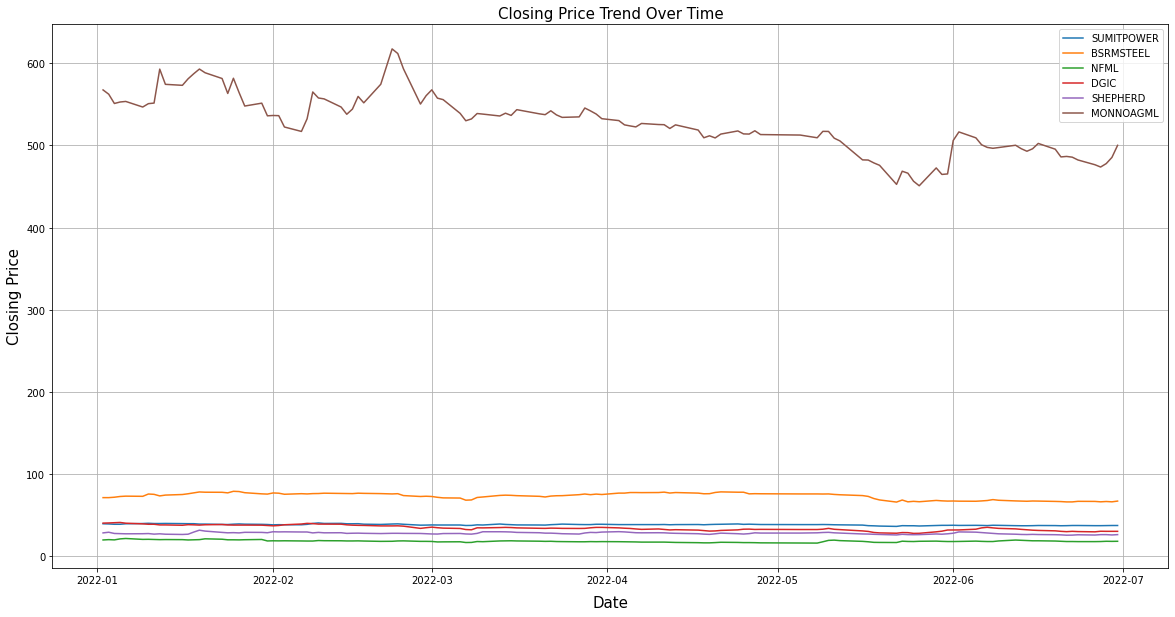

In [17]:
plt.figure(figsize=(20, 10))

for comp in companies:
    comp_data = stock_data[stock_data['Name']==comp]
    plt.plot(comp_data['Date'], comp_data['Close'], label=comp)

plt.xlabel('Date', labelpad=10, fontdict=font)
plt.ylabel('Closing Price', fontdict=font)
plt.title('Closing Price Trend Over Time', fontdict=font)
plt.legend()
plt.grid()

plt.show()

<h3>2) Calculate and plot the daily percentage change in closing prices.<h3>

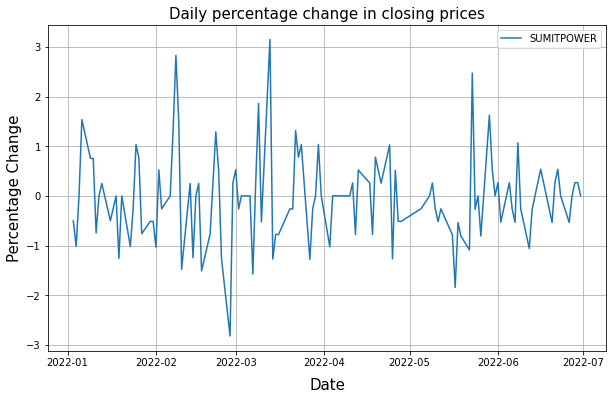

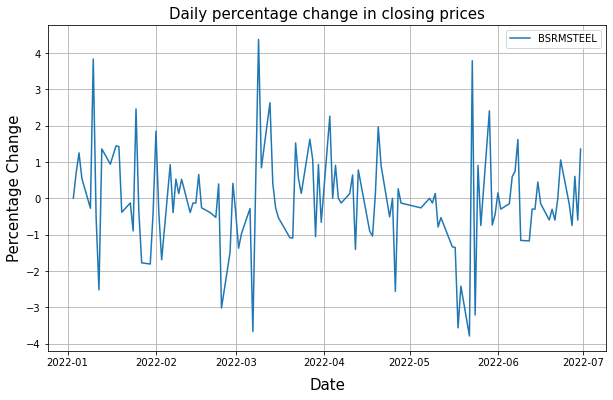

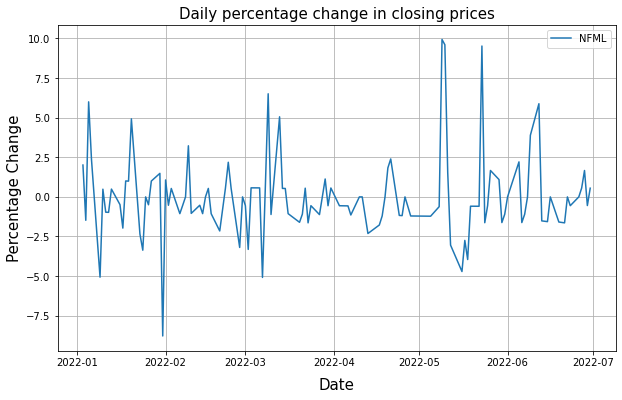

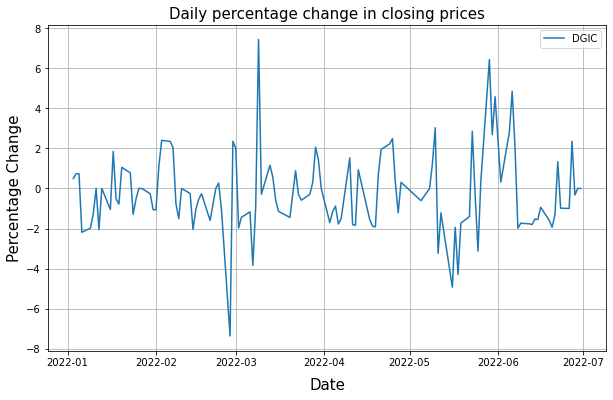

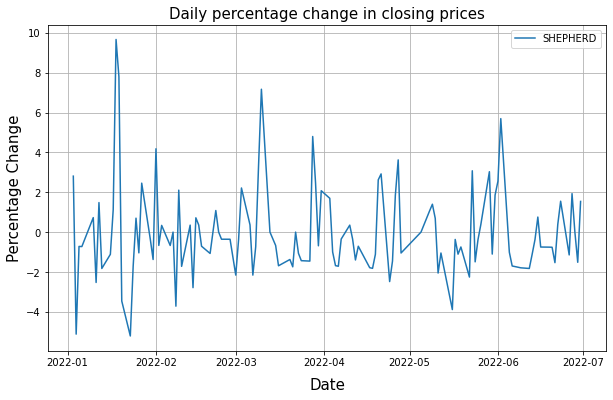

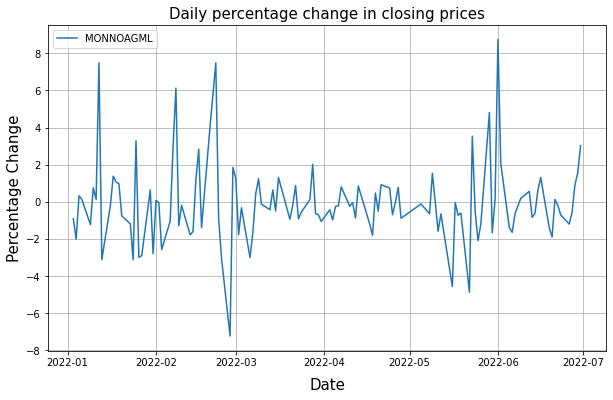

In [18]:
for comp in companies:
    plt.figure(figsize=(10, 6))
    comp_data = stock_data[stock_data['Name']==comp]
    plt.plot(comp_data['Date'], comp_data['Close'].pct_change()*100, label=comp)

    plt.xlabel('Date', labelpad=10, fontdict=font)
    plt.ylabel('Percentage Change', fontdict=font)
    plt.title('Daily percentage change in closing prices', fontdict=font)
    plt.legend()
    plt.grid()

    plt.show()

<h3>3) Investigate the presence of any trends or seasonality in the stock prices.<h3>

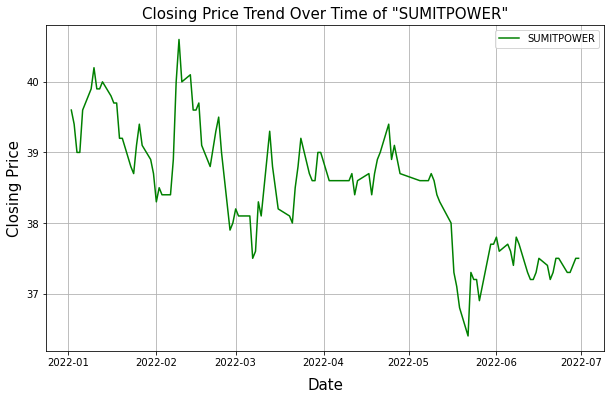

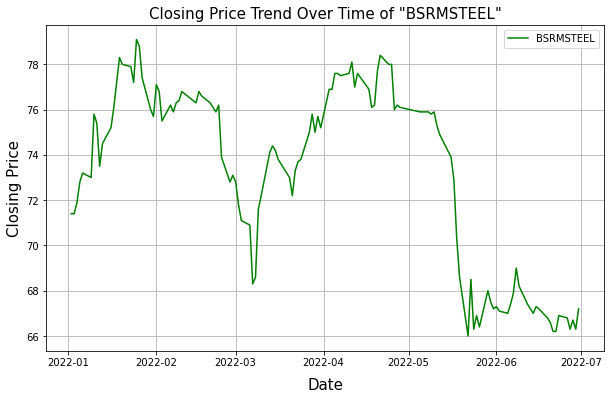

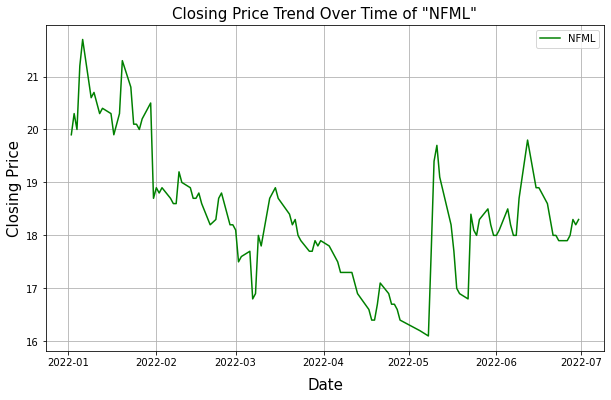

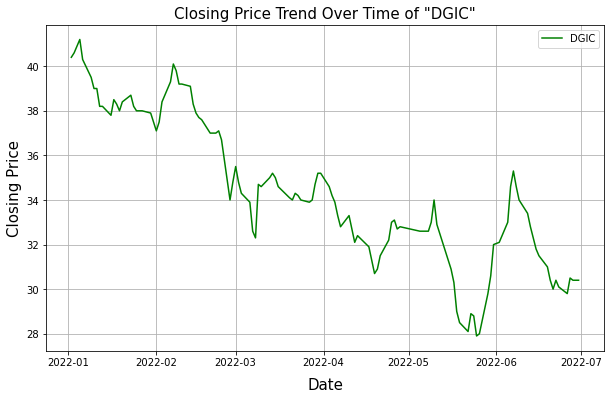

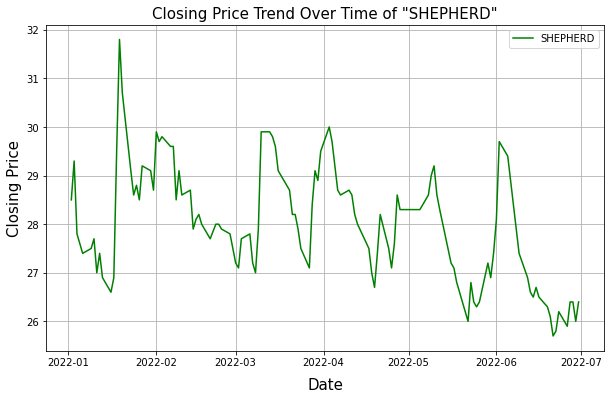

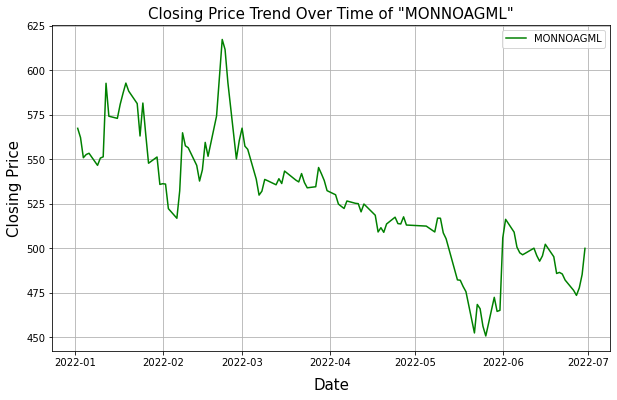

In [19]:
for comp in companies:
    plt.figure(figsize=(10, 6))
    
    comp_data = stock_data[stock_data['Name']==comp]
    plt.plot(comp_data['Date'], comp_data['Close'], label=comp, color='g')
        
    plt.xlabel('Date', labelpad=10, fontdict=font)
    plt.ylabel('Closing Price', fontdict=font)
    plt.title(f'Closing Price Trend Over Time of "{comp}"', fontdict=font)
    plt.legend()
    plt.grid()

    plt.show()

> *Almost every stock price dropped significantly in **May, 2022**.*

<h3>4) Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.<h3>

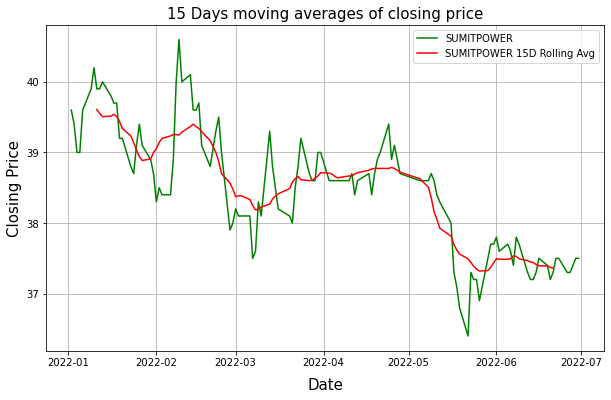

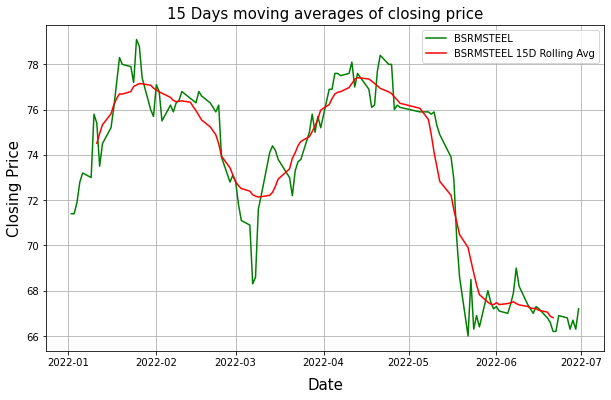

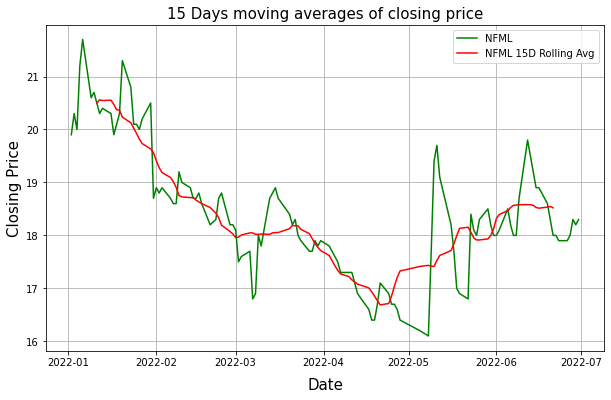

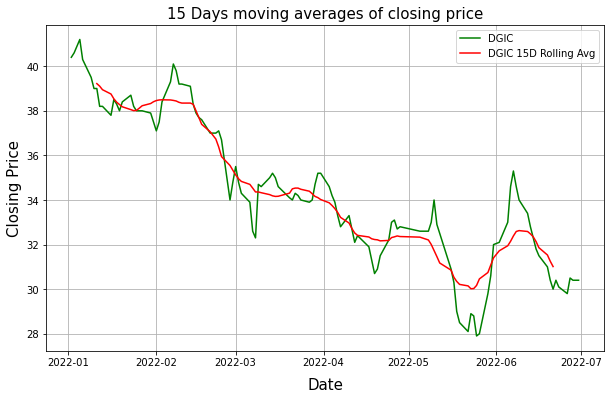

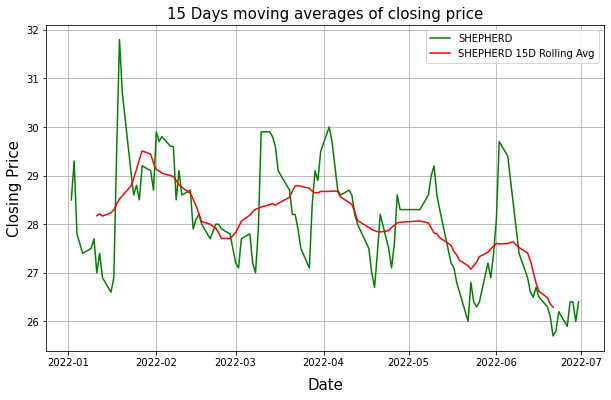

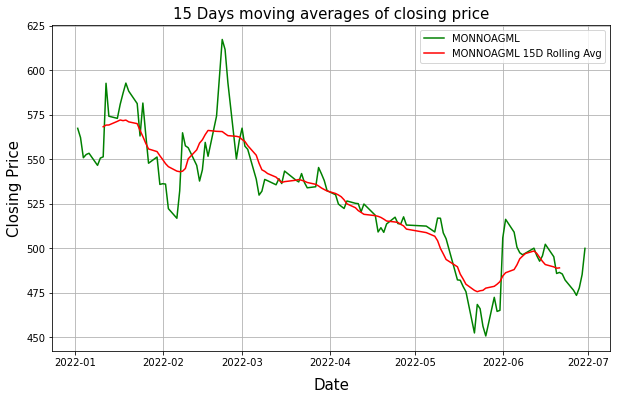

In [20]:
for comp in companies:
    plt.figure(figsize=(10, 6))
    
    comp_data = stock_data[stock_data['Name']==comp]
    plt.plot(comp_data['Date'], comp_data['Close'], label=comp, color='g')
    
    comp_rolling_avg = comp_data['Close'].rolling(window=15, center=True).mean()
    plt.plot(comp_data['Date'], comp_rolling_avg, label=f'{comp} 15D Rolling Avg', color='r')
    
    plt.xlabel('Date', labelpad=10, fontdict=font)
    plt.ylabel('Closing Price', fontdict=font)
    plt.title('15 Days moving averages of closing price', fontdict=font)
    plt.legend()
    plt.grid()

    plt.show()

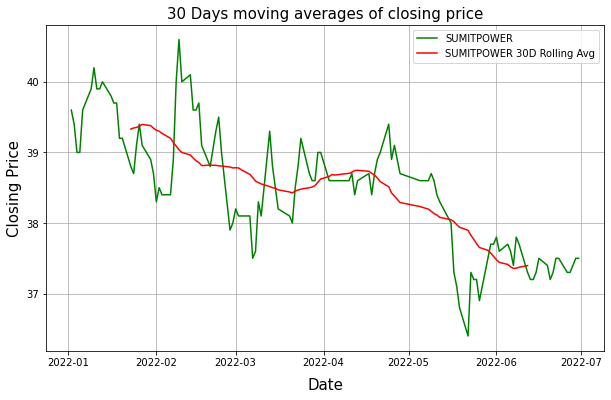

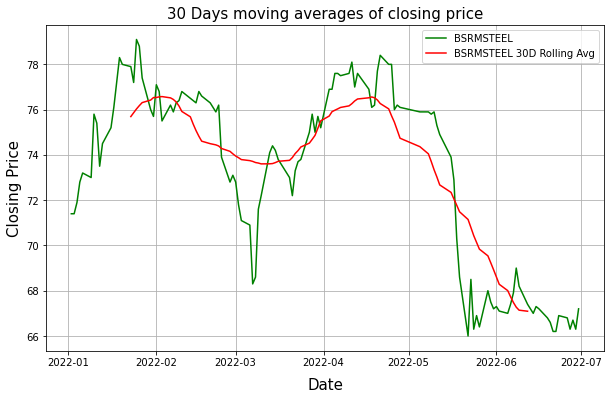

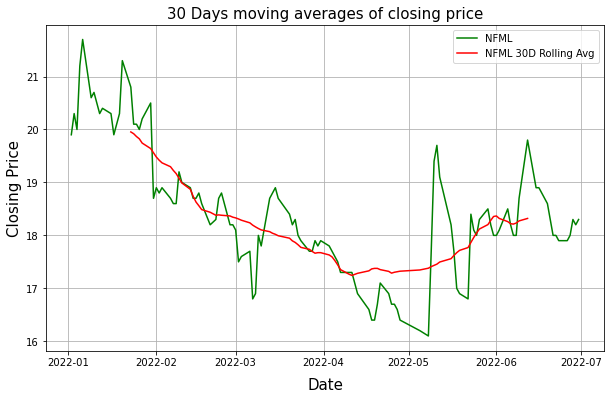

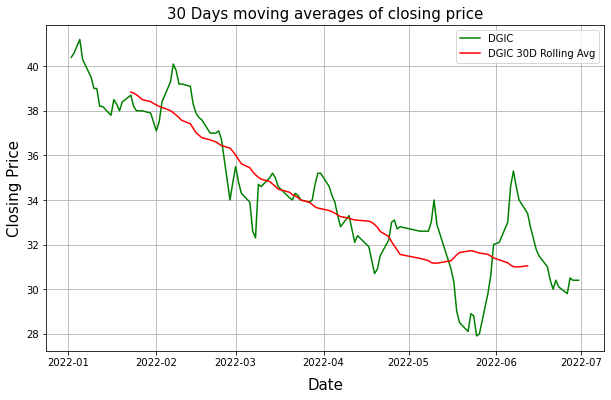

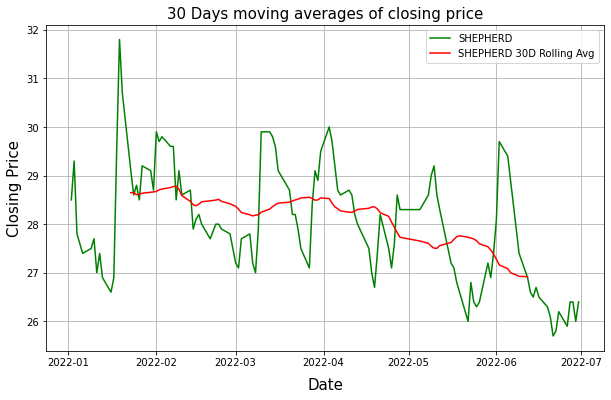

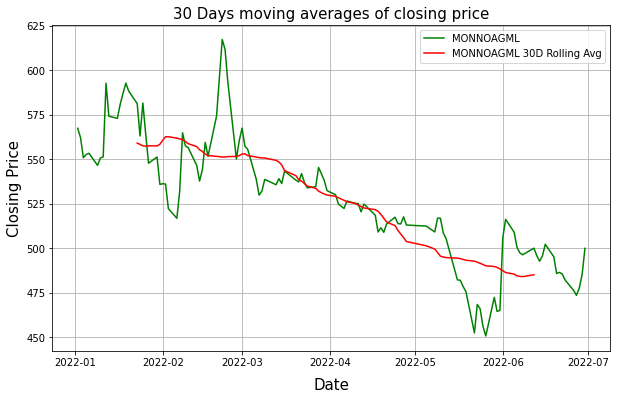

In [21]:
for comp in companies:
    plt.figure(figsize=(10, 6))
    
    comp_data = stock_data[stock_data['Name']==comp]
    plt.plot(comp_data['Date'], comp_data['Close'], label=comp, color='g')
    
    comp_rolling_avg = comp_data['Close'].rolling(window=30, center=True).mean()
    plt.plot(comp_data['Date'], comp_rolling_avg, label=f'{comp} 30D Rolling Avg', color='r')
    
    plt.xlabel('Date', labelpad=10, fontdict=font)
    plt.ylabel('Closing Price', fontdict=font)
    plt.title('30 Days moving averages of closing price', fontdict=font)
    plt.legend()
    plt.grid()

    plt.show()

<h3>5) Calculate the average closing price for each stock.<h3>

In [22]:
company_avg = []

for comp in unique_comp:
    company_data = stock_data[stock_data['Name']==comp]
    company_avg.append(company_data['Close'].mean())

df_avg_close = pd.DataFrame(data={'Company Name':unique_comp,
                                  'Average Close Price':company_avg})
df_avg_close

,Company Name,Average Close Price
0,01.Bank,21.260902
1,02.Cement,96.600820
2,03.Ceramics_Sector,71.225164
3,04.Engineering,132.352459
4,05.Financial_Institutions,29.253525
...,...,...
407,ZEALBANGLA,150.338525
408,CROWNCEMNT,66.630588
409,JHRML,72.633333
410,PBLPBOND,4836.195652


<h3>6) Identify the top 5 and bottom 5 stocks based on average closing price.<h3>

> **Top 5 stocks**

In [23]:
df_avg_close.sort_values(by='Average Close Price', ascending=False).head()

,Company Name,Average Close Price
56,APSCLBOND,5413.238636
316,RECKITTBEN,5342.024793
294,PREBPBOND,4918.357143
177,IBBL2PBOND,4851.330357
410,PBLPBOND,4836.195652


> **Bottom 5 stocks**

In [24]:
df_avg_close.sort_values(by='Average Close Price', ascending=True).head()

,Company Name,Average Close Price
143,FAMILYTEX,4.698361
186,ICBIBANK,4.725620
148,FBFIF,5.289344
289,POPULAR1MF,5.368033
287,PHPMF1,5.417213


# Part 3: Volatility Analysis:

<h3>1) Calculate and plot the rolling standard deviation of the 'Close' prices.<h3>

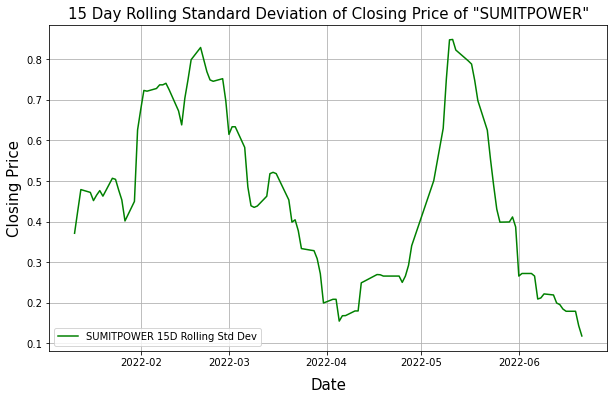

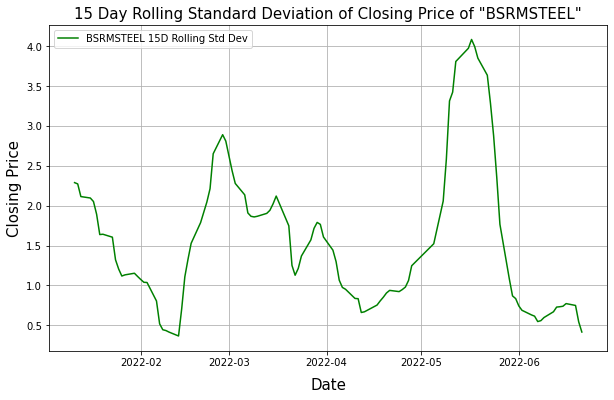

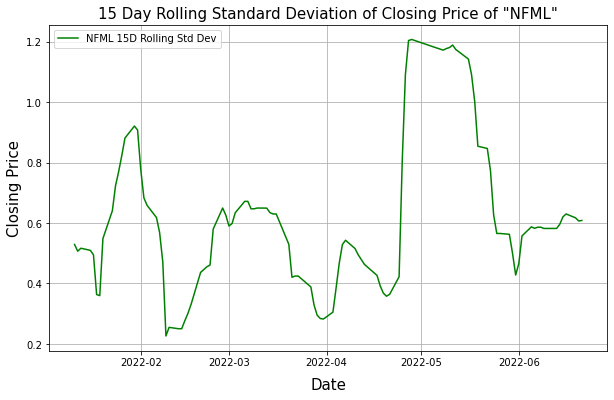

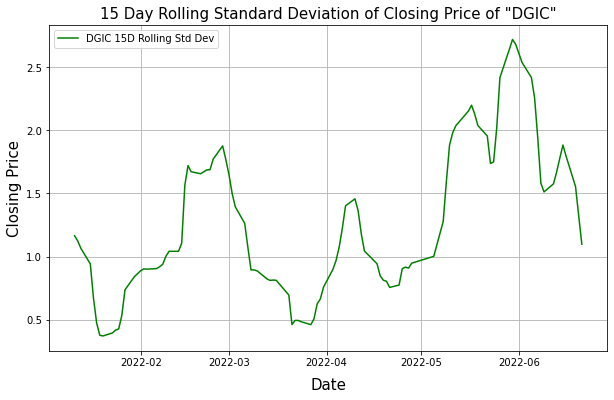

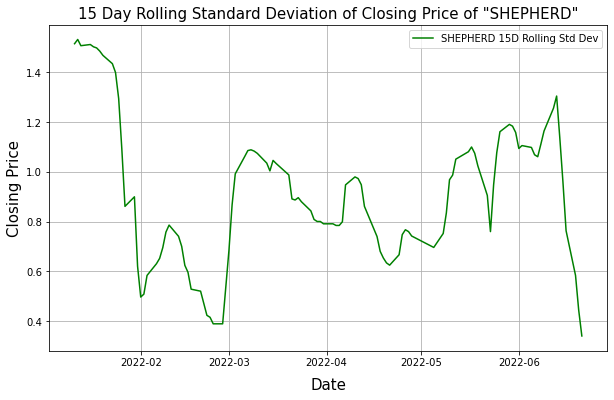

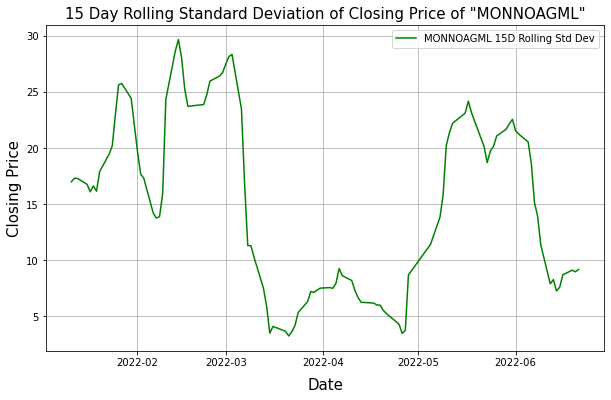

In [36]:
for comp in companies:
    plt.figure(figsize=(10, 6))
    
    comp_data = stock_data[stock_data['Name']==comp]
        
    comp_rolling_stddev = comp_data['Close'].rolling(window=15, center=True).std()
    plt.plot(comp_data['Date'], comp_rolling_stddev, label=f'{comp} 15D Rolling Std Dev', color='g')
    
    plt.xlabel('Date', labelpad=10, fontdict=font)
    plt.ylabel('Closing Price', fontdict=font)
    plt.title(f'15 Day Rolling Standard Deviation of Closing Price of "{comp}"', fontdict=font)
    plt.legend()
    plt.grid()

    plt.show()

<h3>2) Create a new column for daily price change (Close - Open).<h3>

In [26]:
df2 = stock_data.copy()
df2.head()

,Date,Name,Open,High,Low,Close,Volume
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [27]:
df2['Daily Price Change'] = stock_data['Close'] - stock_data['Open']
df2

,Date,Name,Open,High,Low,Close,Volume,Daily Price Change
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41,0.10
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63,-0.13
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97,-0.01
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81,0.07
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19,0.25
...,...,...,...,...,...,...,...,...
49153,2022-06-26,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00,1.30
49154,2022-06-27,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00,-6.60
49155,2022-06-28,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00,-1.90
49156,2022-06-29,ZEALBANGLA,167.10,169.00,164.90,165.10,6678.00,-2.00


<h3>3) Analyze the distribution of daily price changes.<h3>

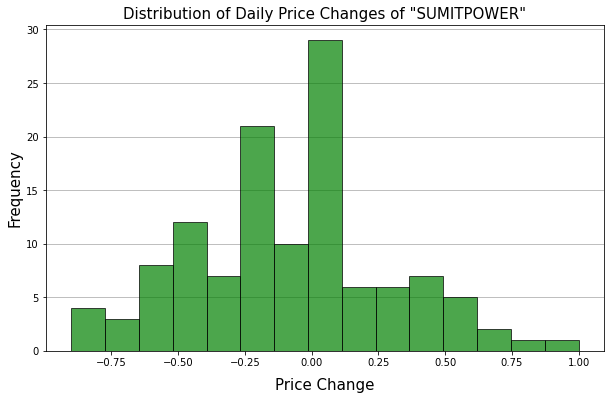

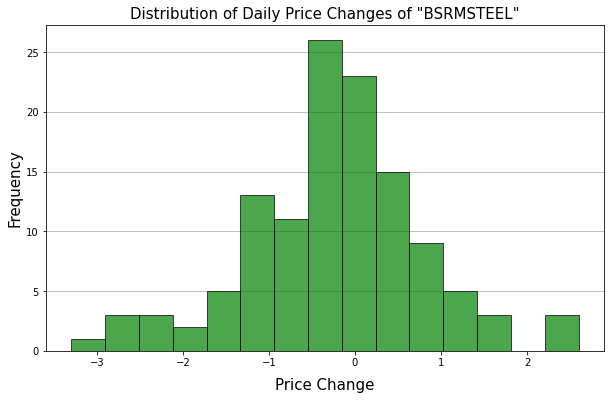

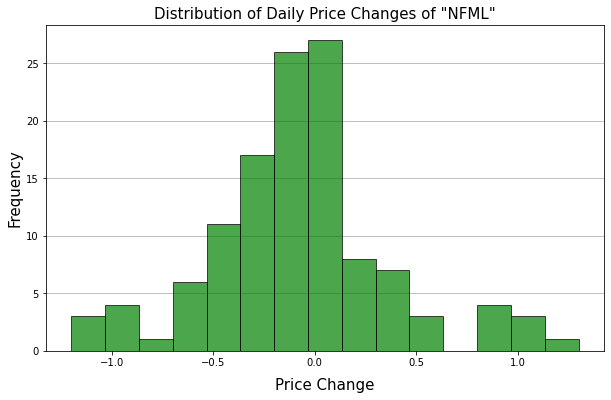

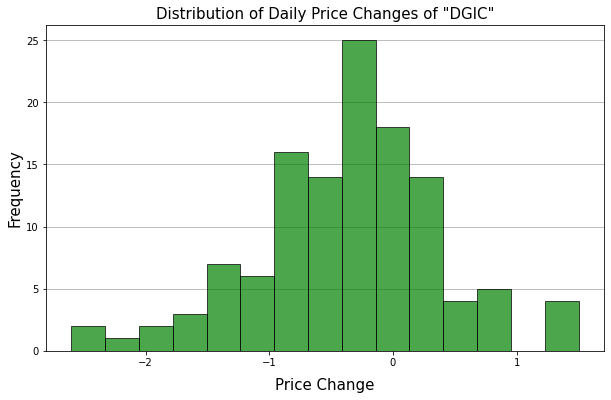

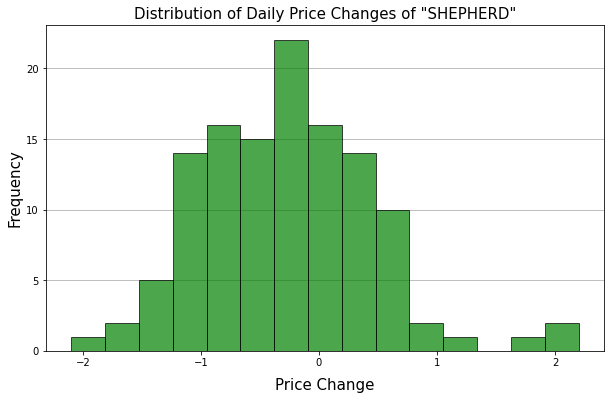

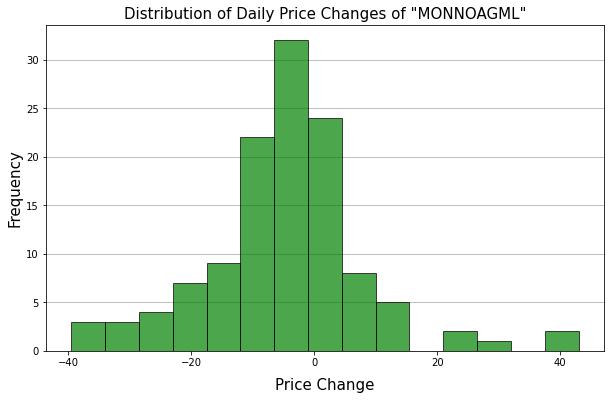

In [28]:
for comp in companies:
    plt.figure(figsize=(10, 6))
    
    comp_data = df2[df2['Name']==comp]
    daily_price_change = comp_data['Daily Price Change']
    
    plt.hist(daily_price_change, bins=15, edgecolor='black', color='g', alpha=0.7, zorder=2)
    
    plt.xlabel('Price Change', labelpad=10, fontdict=font)
    plt.ylabel('Frequency', fontdict=font)
    plt.title(f'Distribution of Daily Price Changes of "{comp}"', fontdict=font)
    plt.grid(axis='y')

    plt.show()

<h3>4) Identify days with the largest price increases and decreases.<h3>

> **The largest price increases** ⏫

In [29]:
df2.sort_values('Daily Price Change', ascending=False).head(1)

,Date,Name,Open,High,Low,Close,Volume,Daily Price Change
48081,2022-06-29,SJIBLPBOND,4710.0,4899.0,4710.0,4897.0,101.0,187.0


> **The largest price decreases** ⏬

In [30]:
df2.sort_values('Daily Price Change', ascending=True).head(1)

,Date,Name,Open,High,Low,Close,Volume,Daily Price Change
23365,2022-03-07,RECKITTBEN,5753.0,5753.0,5550.0,5563.8,1876.0,-189.2


<h3>5) Identify stocks with unusually high trading volume on certain days.<h3>

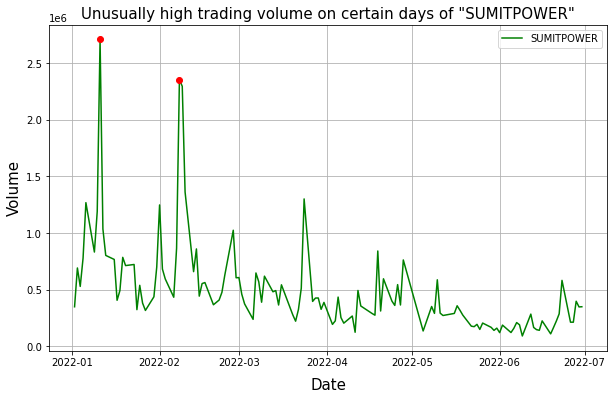

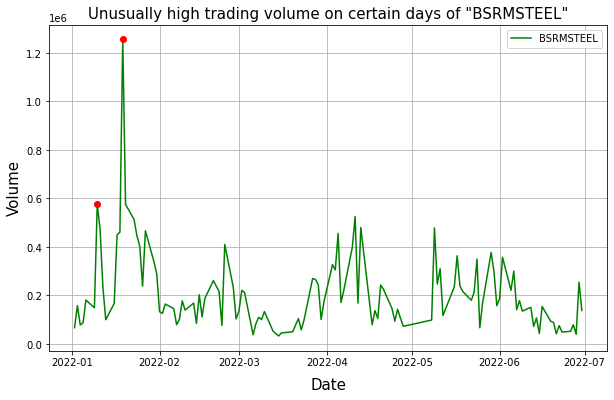

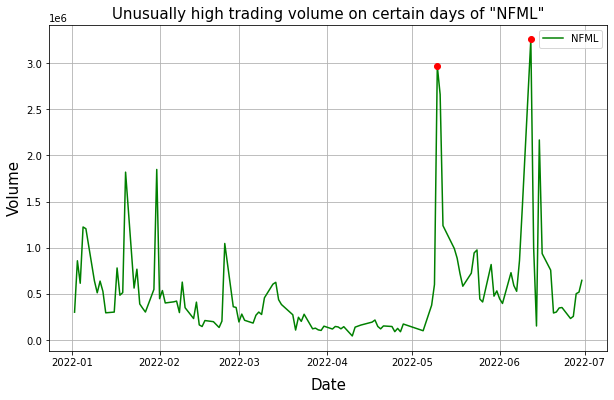

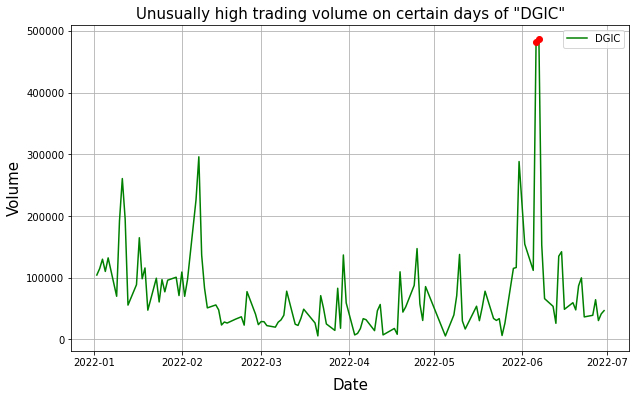

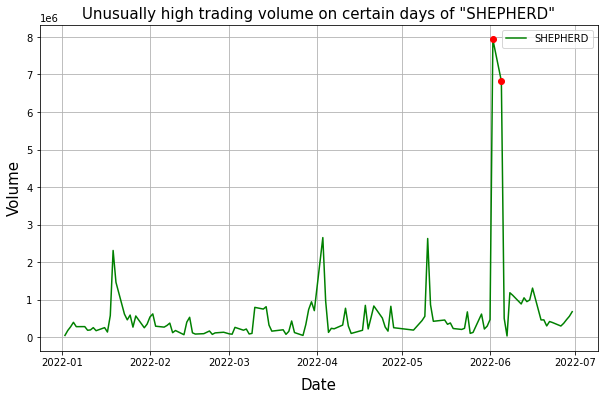

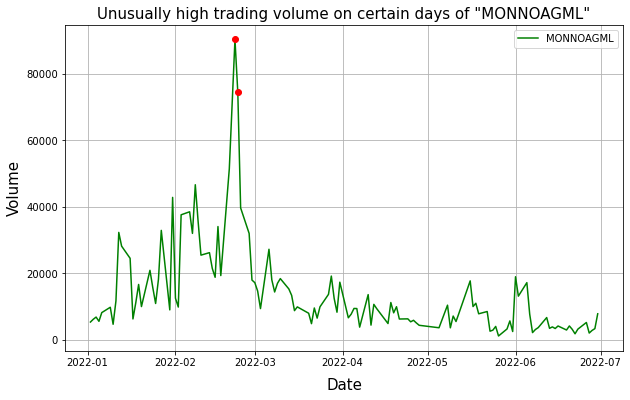

In [31]:
for comp in companies:
    plt.figure(figsize=(10, 6))
    
    comp_data = stock_data[stock_data['Name']==comp]
    plt.plot(comp_data['Date'], comp_data['Volume'], label=comp, color='g')
    
    temp = comp_data['Volume'].quantile(0.99)
    high_trading = comp_data[comp_data['Volume'] > temp]
    plt.scatter(high_trading['Date'], high_trading['Volume'], color='r', zorder=3)
    
    plt.xlabel('Date', labelpad=10, fontdict=font)
    plt.ylabel('Volume', fontdict=font)
    plt.title(f'Unusually high trading volume on certain days of "{comp}"', fontdict=font)
    plt.legend()
    plt.grid()

    plt.show()

# Part 4: Correlation and Heatmaps:

<h3>1) Explore the relationship between trading volume and volatility.<h3>

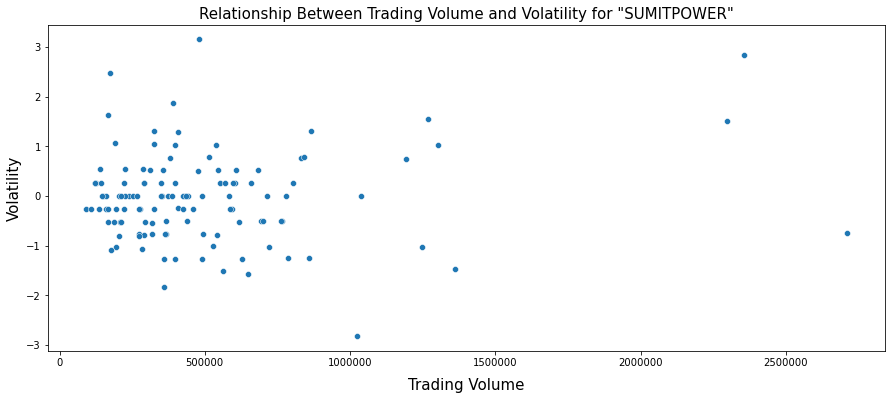

Correlation between Trading Volume and Volatility for SUMITPOWER: 0.11




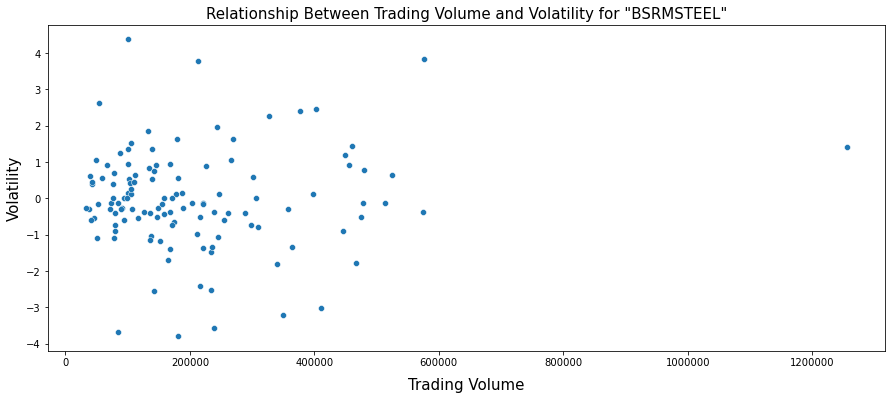

Correlation between Trading Volume and Volatility for BSRMSTEEL: 0.07




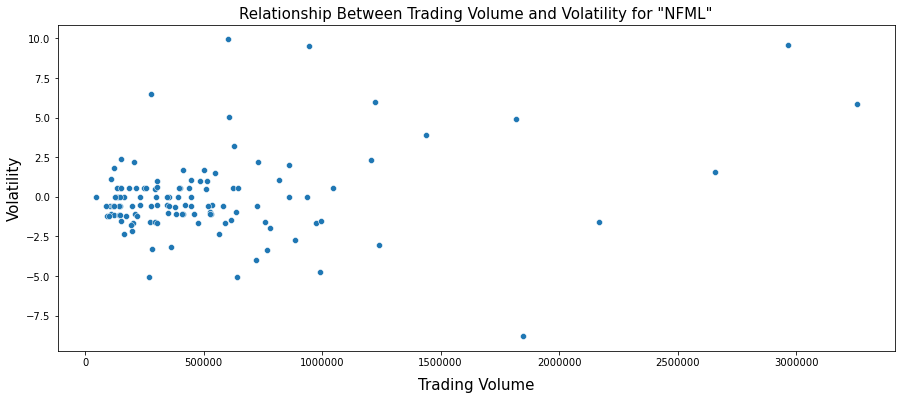

Correlation between Trading Volume and Volatility for NFML: 0.29




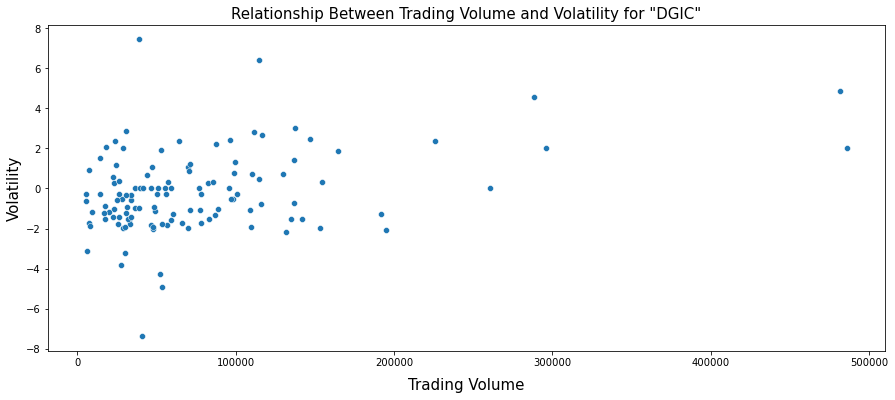

Correlation between Trading Volume and Volatility for DGIC: 0.36




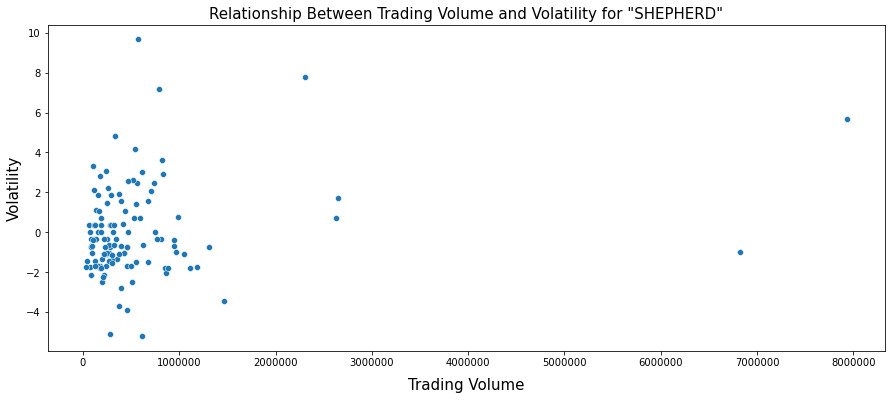

Correlation between Trading Volume and Volatility for SHEPHERD: 0.22




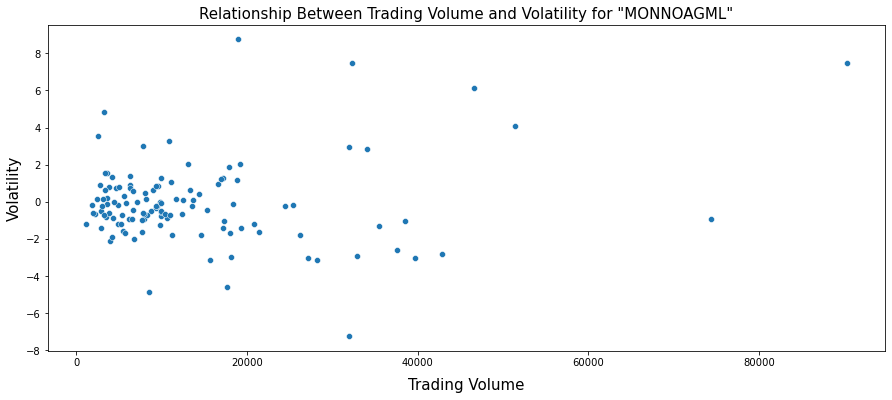

Correlation between Trading Volume and Volatility for MONNOAGML: 0.16




In [32]:
for comp in companies:
    company_data = stock_data[stock_data['Name'] == comp].copy()

    company_data['Volatility'] = company_data['Close'].pct_change() * 100

    plt.figure(figsize=(15, 6))
    sns.scatterplot(x='Volume', y='Volatility', data=company_data)
    plt.ticklabel_format(style='plain', axis='x')

    plt.title(f'Relationship Between Trading Volume and Volatility for "{comp}"', fontdict=font)
    plt.xlabel('Trading Volume', fontdict=font, labelpad=10)
    plt.ylabel('Volatility', fontdict=font)

    plt.show()

    correlation = round(company_data['Volume'].corr(company_data['Volatility']), 2)
    print(f'Correlation between Trading Volume and Volatility for {comp}: {correlation}\n\n')

<h3>2) Calculate the correlation matrix between the 'Open' & 'High', 'Low' & 'Close' prices.<h3>

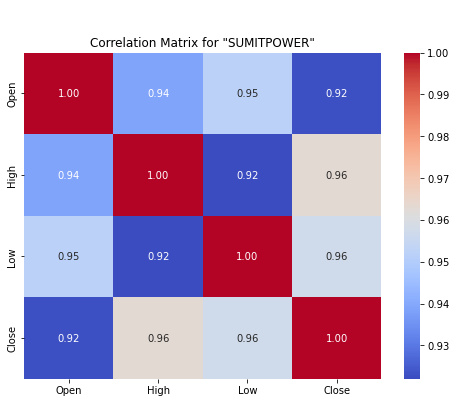

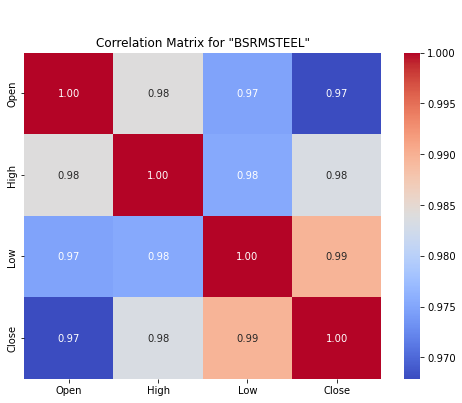

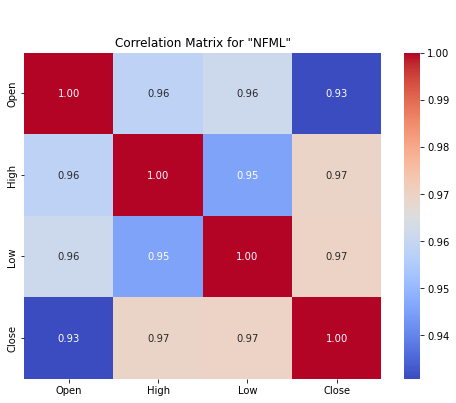

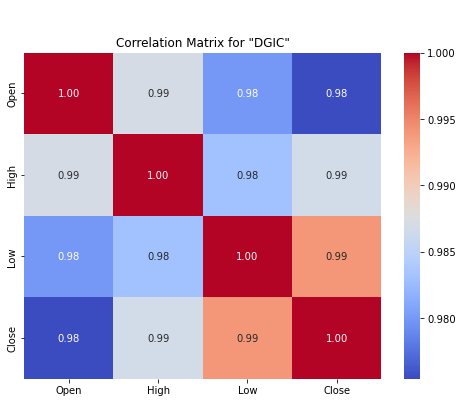

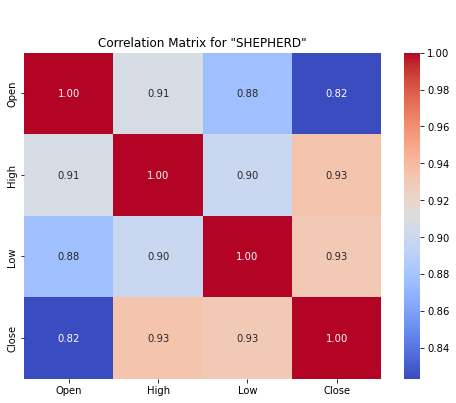

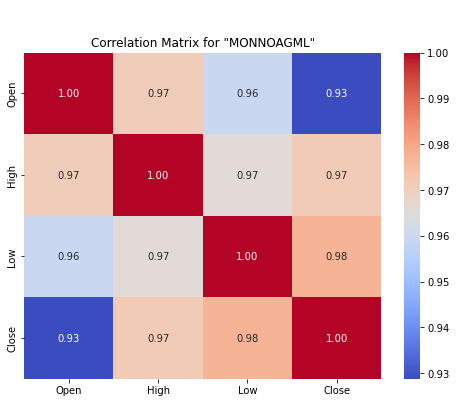

In [33]:
for comp in companies:
    company_data = stock_data[stock_data['Name'] == comp].copy()
    columns = ['Open', 'High', 'Low', 'Close']
    
    correlation_matrix = company_data[columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'\n\nCorrelation Matrix for "{comp}"')
    plt.show()

<h3>3) Create a heatmap to visualize the correlations using the seaborn package.<h3>

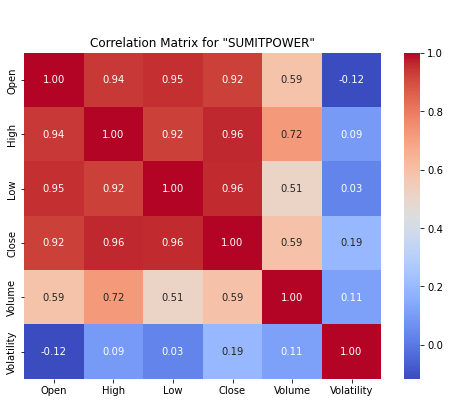

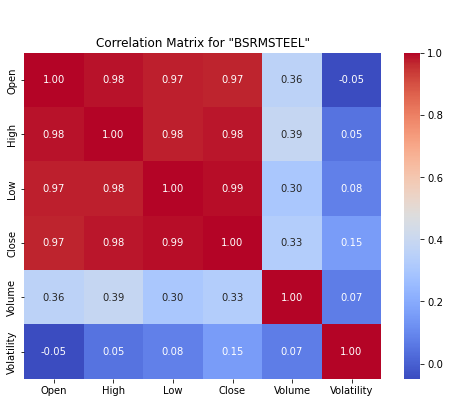

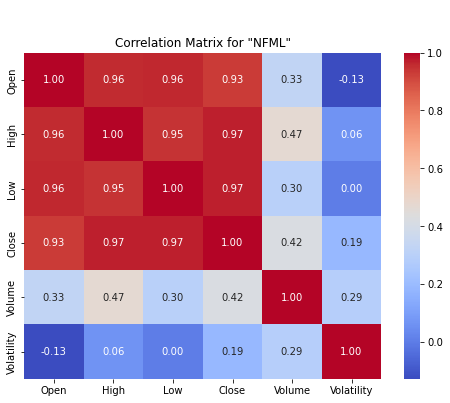

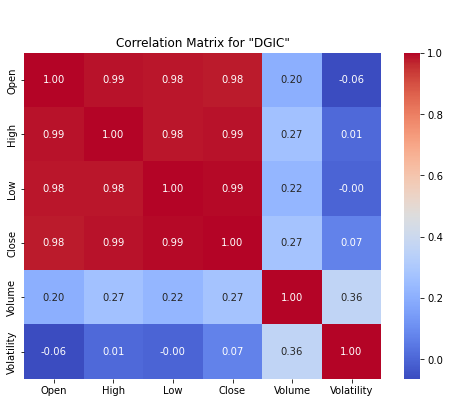

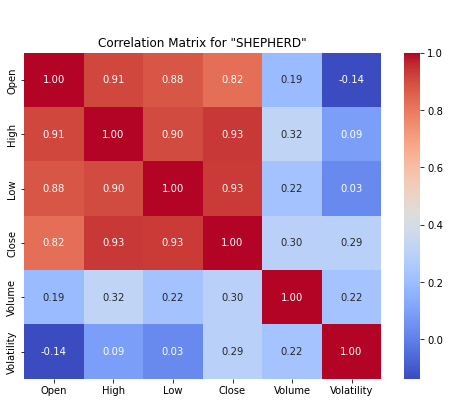

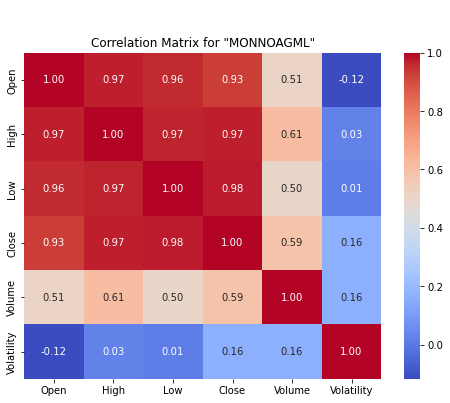

In [34]:
for comp in companies:
    company_data = stock_data[stock_data['Name'] == comp].copy()
    company_data['Volatility'] = company_data['Close'].pct_change() * 100
    
    columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility']
    
    correlation_matrix = company_data[columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'\n\nCorrelation Matrix for "{comp}"')
    plt.show()

# Bonus Task:

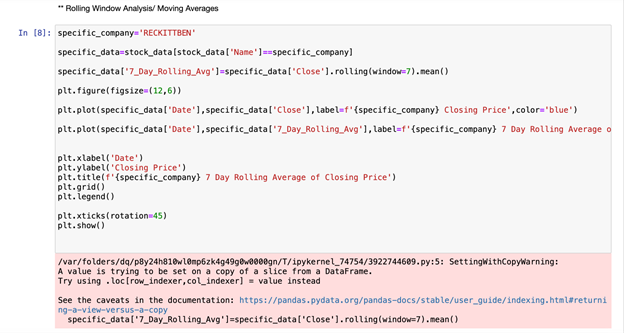

<h3>During the rolling window analysis, we encountered a warning. Find out what's causing this & apply a fix to avoid the warning.<h3>

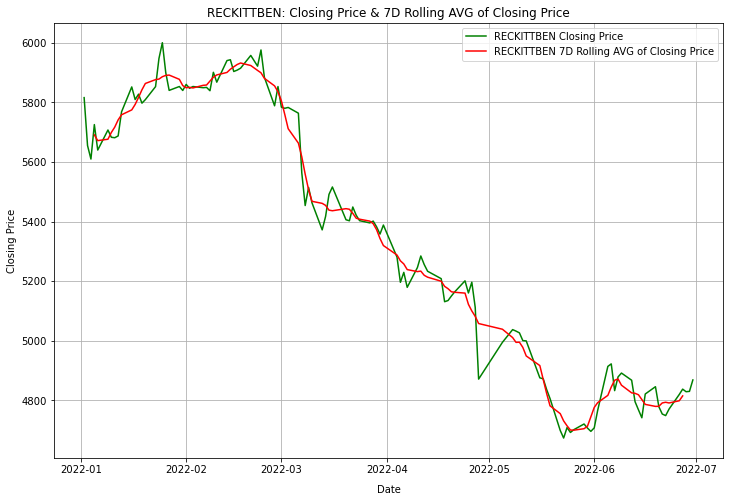

In [35]:
company = 'RECKITTBEN'
company_data = stock_data[stock_data['Name']==company].copy()

company_data['7D Rolling AVG'] = round(company_data['Close'].rolling(window=7, center=True).mean(), 1)

plt.figure(figsize=(12,8))
plt.plot(company_data['Date'], company_data['Close'], label=f'{company} Closing Price', color='g')
plt.plot(company_data['Date'], company_data['7D Rolling AVG'], label=f'{company} 7D Rolling AVG of Closing Price', color='r')

plt.xlabel('Date', labelpad=10)
plt.ylabel('Closing Price')
plt.title(f'{company}: Closing Price & 7D Rolling AVG of Closing Price')
plt.legend()
plt.grid()

# plt.xticks(rotation=45) # Improving readability
plt.show()